In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

25000 train sequences
25000 test sequences
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [3]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

2023-10-05 11:36:58.346258: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-05 11:36:58.346359: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-10-05 11:36:58.346385: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-10-05 11:36:58.346464: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-05 11:36:58.346487: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 98, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 3

In [4]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10


2023-10-05 11:37:27.857545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 24s 144ms/step - loss: 1.0682 - accuracy: 0.6583 - val_loss: 0.5253 - val_accuracy: 0.8016
Epoch 2/10
157/157 [==============================] - 12s 78ms/step - loss: 0.4052 - accuracy: 0.8740 - val_loss: 0.4904 - val_accuracy: 0.8568
Epoch 3/10
157/157 [==============================] - 11s 69ms/step - loss: 0.3108 - accuracy: 0.9155 - val_loss: 0.4433 - val_accuracy: 0.8790
Epoch 4/10
157/157 [==============================] - 11s 71ms/step - loss: 0.2220 - accuracy: 0.9474 - val_loss: 0.8633 - val_accuracy: 0.8252
Epoch 5/10
157/157 [==============================] - 10s 62ms/step - loss: 0.1969 - accuracy: 0.9604 - val_loss: 0.6033 - val_accuracy: 0.8764
Epoch 6/10
157/157 [==============================] - 9s 56ms/step - loss: 0.1460 - accuracy: 0.9790 - val_loss: 0.8225 - val_accuracy: 0.8710
Epoch 7/10
157/157 [==============================] - 8s 53ms/step - loss: 0.1198 - accuracy: 0.9869 - val_loss: 0.8569 - val_accuracy: 0.8802
Epoc

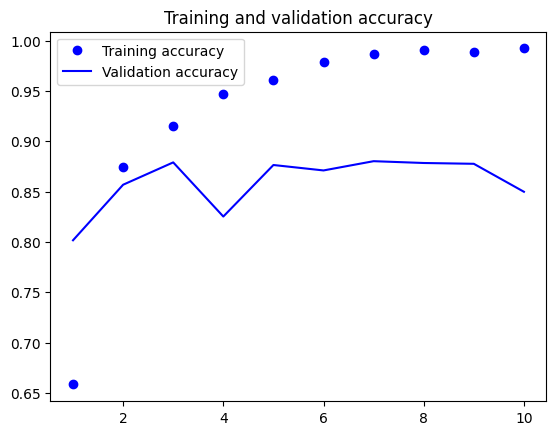

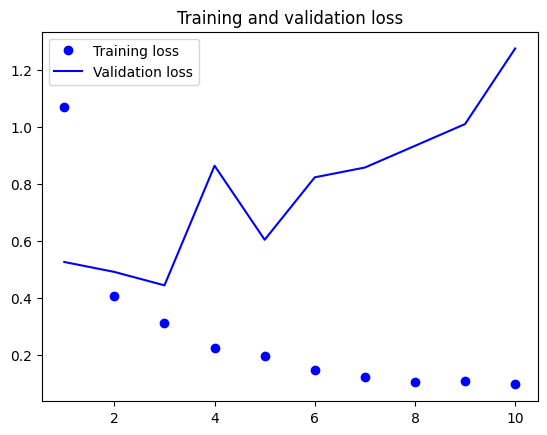

In [5]:
from plot_history import plot_history

plot_history(history)